<a href="https://colab.research.google.com/github/ardeeshany/Deep-Learning-Projects/blob/main/2022_04_DL_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Intution

- MaxPooling -> less care about the exact poistion -> reducing overfitting

- Conv Process: Reverse Kernel (top to bottom & right to left) + multiple by image element by element + add them up into one number

- ConvNets (CNN) will learn the kernels for each node and capture spatial local patterns (as the img pixels have spatial correlation)! -> It tries to match only parts of an image and they are blind to many patterns!

- [28 x 28 x 3] image will produce an output of [28 x 28 x 16] if 16 kernels are being learnt. 

- In Keras, the input layer is not a layer, but a tensor you send to the first hidden layer. This tensor must have the same shape as your training data. If you have 100 images of 28*28 pixels in RGB (3 channels), the shape of your input data is (100, 28, 28, 3).

- Structure: Conv + ReLU (dying nodes and gradient vanishing problems) + Pooling

- Conv(Image, Kernel) -> Feature Map

- Using `Zero Padding` when dealing with Newtorks have too many layers! `Conv2D(..., padding = 'same', strides = 2, dilation_rate = 1)`

- Dense `input_shape = (batch_size, img_rows (width), img_cols (heights), num_channels) = (img_rows, img_cols, num_channels)`

- Cost of being deeper: 1. Computation cost 2. Need more data

- In CNN, the most of the parameters are calculated in the last layer (Flatten)

- in CNN, in each layer, it generates a new image where some charactristics are amplified!

- In CNN, all the convolutional parts are in charge to do feature engineering -> The Flatten part is doing classification!

---

# Setup:

### PreProcessing

```python
# matplotlib
plt.imread()
plt.imshow()
data.reshape()
```


- `train_test_split(X,y, 0.3)`
```python
def get_model(...):  
  ...  
  return model`
```

### Visualization:
  - `sns.pairplot(data, hue = 'foo')`

### Compile
  - Binary Classification: `loss = 'binary_crossentropy'` -> `activation = 'sigmoid'`
  - Multi-class Classification: `loss = 'categorical_crossentropy'` -> `activation = 'softmax'`
  - Multi-lable Classification: `loss = 'binary_crossentropy'` -> `activation = 'sigmoid'`


---

# Improve:

In many cases, the curves are not smooth; the main reasons are:
- optimizer
- learning rate
- batch size
- network architecture
- weight initialization
- size of data
- etc

### Performance & Regularization -> Avoid overfitting

  - `batch_size`: bigger batch size when dealing with bigger data
    - sgd -> `batch_size = 1`
    - mini batch -> `batch_size = 32, 64, ...` -> updates weights 32 times in each epoch -> Keras default is 32
    - batch gradient descent -> `batch_size = size (rows) of training data` 

 - A `MaxPool2D(2)` may takes the computation 15 times better!
  
  - `Dropout(0.25)`: Randomly turn off some nodes in feedforward and backprop
    - Prevent nodes being overly correlated and each node learns different things
    - Makes the learning slower but more careful
  - `BatchNormalization()`: Take output of a layer and normalize them (mean = 0, sd = 1)
    - Makes the learning faster

There is a concept called "The disharmony between dropout and batchnormalization" -> Usually don't use them both at the same time!


### callbacks

  - To check: `M.history['loss']` and `M.history['val_loss']` -> Matplotlib
  - To save: `callbacks = [ModelCheckpoint('foo.hdf5', monitor = 'val_loss', save_best_only = True)]`
    - `model.load_weights('foo.hdf5')`
  - To stop: `callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4)]`
    - Helps to stop overfitting




### Is your model getting better with more data?
- traind_data [50%, 60%, ... 100%] and each time validate with the whole test data and see what is the curve of loss or accuracy! It is converged or still growing!

### Activation Functions -> Highly effects in classification
- General suggestion: Start with `ReLU` and avoud `sigmoid` in deeper networks



### Hyperparamter Tuning

```python
# sklearn.model_selection
models = RandomizedSearchCV(my_tree_model, params = {'max_depth':[1,3, None]}, cv = 5) 
models.fit(X,y)
models.best_params_
```

```python
def create_model(f1, f2):
    ... Sequential() ... .compile()
    return model

from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(create_model)

random_search = RandomizedSearchCV(model, params = dict(f1:['x1', 'x2'], f2:[1,2], epochs = 3, batch_size = [16,32]), cv = 3)
rand_search_result = random_serach.fit(X,y)

rand_search_result.best_score_
rand_search_result.best_params_
```

### Model Interpretation by accessing layers:

```python
layer_one = model.layers[0]
layer_one.input
layer_one.output
layer_one.weights

from keras.backend import K

input_to_output = K.function([layer_one.input], [layer_one.output])
input_to_output([X_train])
```


  - `model.layers`

  - `model.layers[0].get_weights()`

  - `kernels = model.layers[0].get_weights()[0]`

  - `plt.imshow(kernels[:,:,0,0])` -> first channel, first node

  - Check `plt.imshow(test_data[3,:,:,0])` -> 3rd image, first channel

  - Compare `plt.imshow(convolution(test_data[3,:,:,0], kernels[]:,:, 0, 0))`


---

# Applications

### Autoencoder: 

- encode into lower dimension, then learn to decode to generate itself!

- Use cases:
  - Domension Reduction
  - Anamoly Detection
  - De noising


- Build a simple version using:

```python
# autoencoder generated as a regular NN where the input and output are the same
encoder = Sequential()
encoder.add(autoencoder.layers[0])
```


### ResNet50

- A 50 layer architecture trained on +14M images, distinguished between 1000 categories.


In [3]:
from keras.preprocessing import image

In [31]:
img = image.load_img("/content/Data-Analytics-and-Marketing.webp", target_size=(224,224))

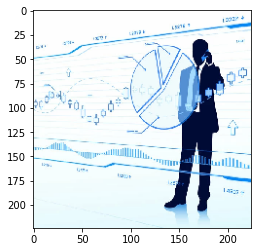

In [32]:
import matplotlib.pyplot as plt
plt.imshow(img);

In [33]:
img_array = image.img_to_array(img)

In [34]:
img_array.shape

(224, 224, 3)

In [35]:
import numpy as np
img = np.expand_dims(img_array, axis = 0)

In [36]:
from keras.applications.resnet import preprocess_input
img = preprocess_input(img)

In [ ]:
from keras.applications.resnet import ResNet50, decode_predictions
model = ResNet50(weights = 'imagenet')
preds = model.predict(img)
preds

In [41]:
decode_predictions(preds, top = 1)

[[('n03630383', 'lab_coat', 0.46617717)]]